In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

In [11]:
X,y=make_regression(n_samples=200,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

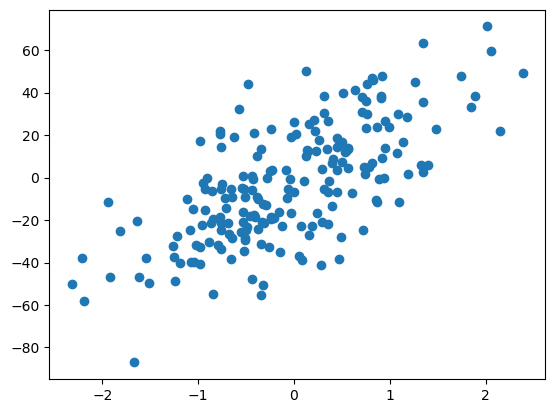

In [12]:
plt.scatter(X,y)

In [41]:
class GDreg:
    def __init__(self,learning_rate,epochs):
        self.m=10 #initializing m with some random value
        self.b=-90 #initializing b with some random value
        self.lr=learning_rate #take input the learning rate from user
        self.epochs=epochs #take the number for iteration from the user
    def fit(self,X,y): # perform the iterations using the datasets
        for i in range(self.epochs): #looping for each iteration dos:
            loss_slope_b=-2*np.sum(y-self.m*X.ravel()-self.b) #calculate loss function for b
            loss_slope_m=-2*np.sum((y-self.m*X.ravel()-self.b)*X.ravel()) #calculate loss function for m

            self.b=self.b-(self.lr*loss_slope_b) #feed the new value calculated for b
            self.m=self.m-(self.lr*loss_slope_m) #feed the new value calculated for m
        print(self.m,self.b)

    def predict(self,X): 
        return self.m*X+self.b

In [50]:
gd=GDreg(0.001,100)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [53]:
gd.fit(X_train,y_train)

20.90788513499574 -2.222371480175953


In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr=LinearRegression()

In [59]:
lr.fit(X_train,y_train)

LinearRegression()

In [60]:
lr.coef_

array([20.90788514])

In [61]:
lr.intercept_

-2.22237148012512

In [62]:
#gradient descent gave better results.let's calculate the r2 score for both gd and lr.

In [64]:
y_pred=gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5035180609349523

In [65]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5035180609390361

In [67]:
# similar results